## Cybersecurity Risk (2022 CISA Vulnerability)

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.ticker import MultipleLocator, FixedLocator
data = pd.read_csv('2022-06-08-enriched.csv')
data.head()

,cve_id,vendor_project,product,vulnerability_name,date_added,short_description,required_action,due_date,notes,grp,pub_date,cvss,cwe,vector,complexity,severity
0,CVE-2021-27104,accellion,FTA,Accellion FTA OS Command Injection Vulnerability,2021-11-03,Accellion FTA 9_12_370 and earlier is affected...,Apply updates per vendor instructions.,2021-11-17,NaN,1,2021-02-16,9.8,CWE-78,NETWORK,LOW,CRITICAL
1,CVE-2021-27102,accellion,FTA,Accellion FTA OS Command Injection Vulnerability,2021-11-03,Accellion FTA 9_12_411 and earlier is affected...,Apply updates per vendor instructions.,2021-11-17,NaN,1,2021-02-16,7.8,CWE-78,LOCAL,LOW,HIGH
2,CVE-2021-27101,accellion,FTA,Accellion FTA SQL Injection Vulnerability,2021-11-03,Accellion FTA 9_12_370 and earlier is affected...,Apply updates per vendor instructions.,2021-11-17,NaN,1,2021-02-16,9.8,CWE-89,NETWORK,LOW,CRITICAL
3,CVE-2021-27103,accellion,FTA,Accellion FTA SSRF Vulnerability,2021-11-03,Accellion FTA 9_12_411 and earlier is affected...,Apply updates per vendor instructions.,2021-11-17,NaN,1,2021-02-16,9.8,CWE-918,NETWORK,LOW,CRITICAL
4,CVE-2021-21017,adobe,Acrobat and Reader,Adobe Acrobat and Reader Heap-based Buffer Ove...,2021-11-03,Acrobat Reader DC versions versions 2020.013.2...,Apply updates per vendor instructions.,2021-11-17,NaN,1,2021-02-11,8.8,CWE-787,NETWORK,LOW,HIGH


In [173]:
print(data.columns)

Index(['cve_id', 'vendor_project', 'product', 'vulnerability_name',
       'date_added', 'short_description', 'required_action', 'due_date',
       'notes', 'grp', 'pub_date', 'cvss', 'cwe', 'vector', 'complexity',
       'severity'],
      dtype='object')


In [174]:
print(data.describe())

       notes         grp        cvss
count    0.0  774.000000  609.000000
mean     NaN   13.434109    8.422496
std      NaN   12.225148    1.301657
min      NaN    1.000000    3.100000
25%      NaN    1.000000    7.800000
50%      NaN   16.000000    8.800000
75%      NaN   20.000000    9.800000
max      NaN   37.000000   10.000000


In [171]:
print(data.dtypes.value_counts())

object     13
float64     2
int64       1
dtype: int64


## Столбчатая диаграмма, отражающая кол-во уязвимостей по их серьёзности

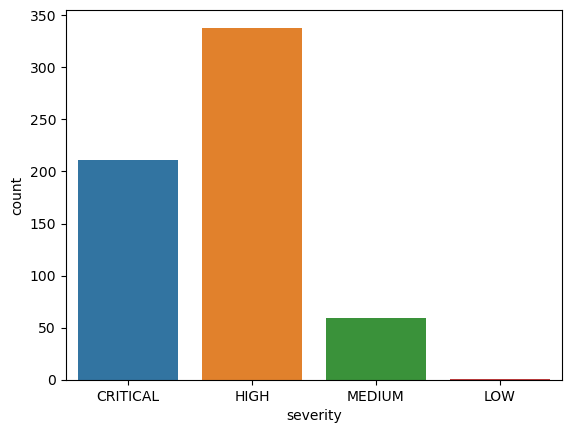

In [18]:
graph1 = sns.countplot(x='severity', data=data)

## Столбчатая диаграмма, отражающая кол-во уязвимостей по их сложности

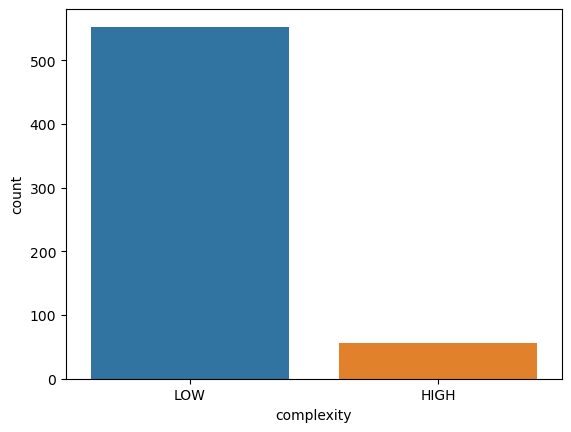

In [4]:
graph1 = sns.countplot(x='complexity', data=data)

## Круговая диаграмма, отражающая процентное соотношение продуктов по кол-ву уязвимостей

/tmp/ipykernel_141556/308976234.py:6: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  big_product_totals = big_product_totals.append(small_sums)


<Axes: >

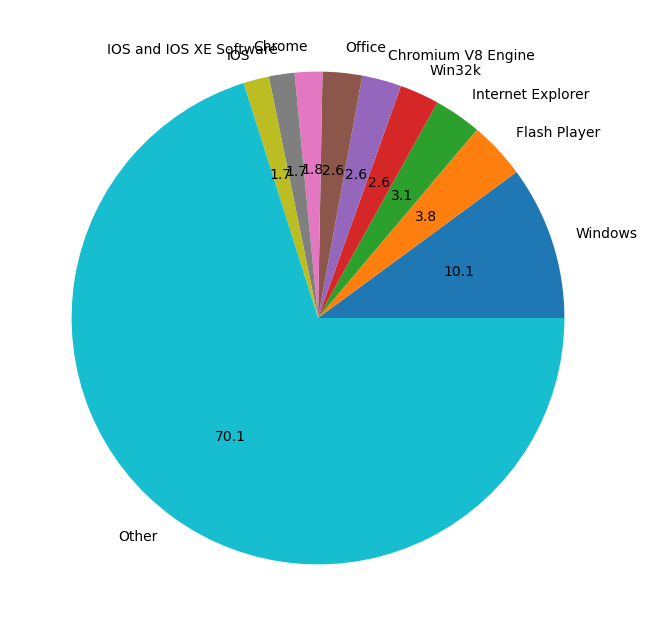

In [114]:
fig = plt.figure(figsize=(10, 8))
data_of_products = data['product'].value_counts()
# продукты, имеющие кол-во уязвимостей меньше 11 попадают в категорию "Other"
small_product_totals = data_of_products[data_of_products < 11]
big_product_totals = data_of_products[data_of_products >= 11]
small_sums = pd.Series([small_product_totals.sum()], index=["Other"])
big_product_totals = big_product_totals.append(small_sums)
big_product_totals.plot(kind="pie", label="", autopct='%.1f')

## Столбчатая диаграмма, отражающая кол-во `CVSS (Common Vulnerability Scoring System)`

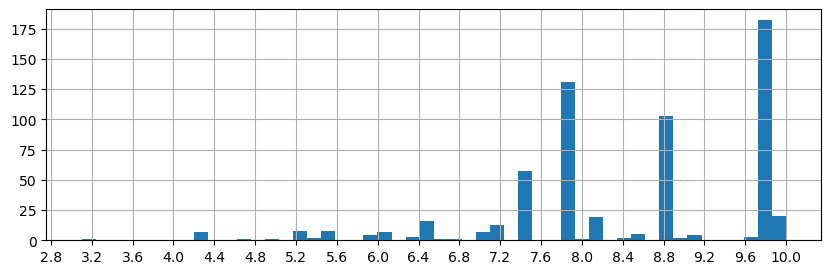

In [177]:
fig = plt.figure(figsize=(10, 3))
ax = fig.add_subplot()
ax.grid()
line1 = ax.hist(data['cvss'], 50)
ax.xaxis.set_major_locator(MultipleLocator(base=0.4))

## Линейный график, отражающий сложность (complexity) к cvss

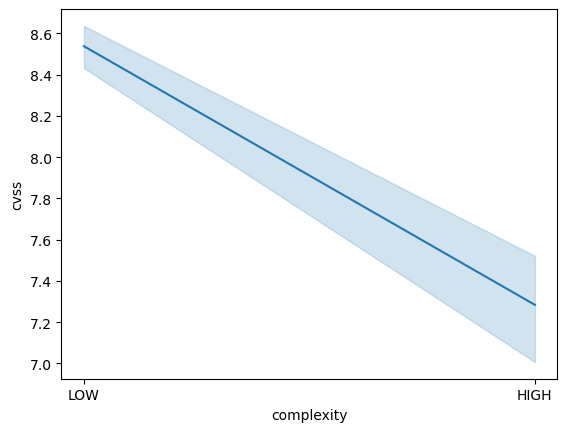

In [136]:
x = sns.lineplot(data=data, x="complexity", y="cvss")

## Столбчатая диаграмма, отражающая кол-во групп уязвимостей (grp)

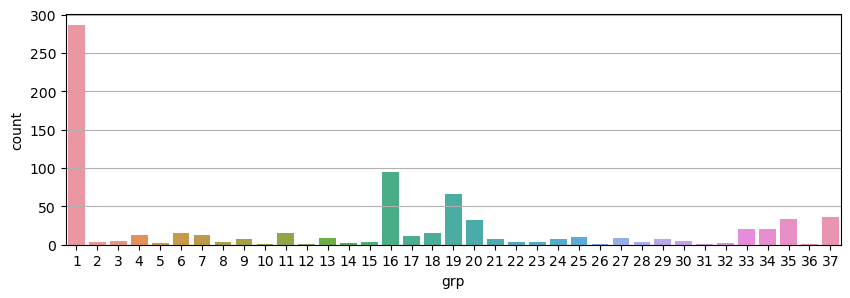

In [178]:
fig = plt.figure(figsize=(10, 3))
ax = fig.add_subplot()
ax.grid()
graph = sns.countplot(x='grp', data=data)

## 

## Область уязвимости (vector) к её cvss

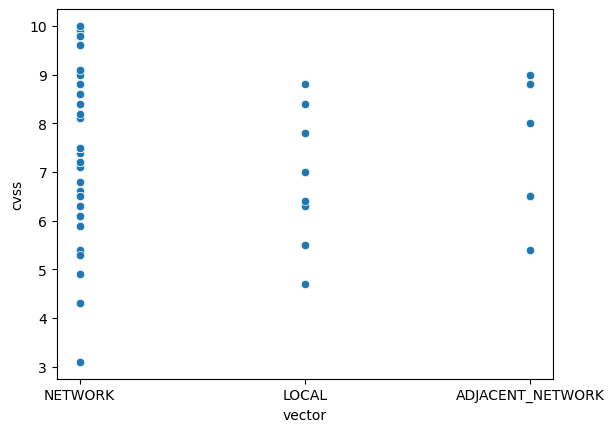

In [164]:
x = sns.scatterplot(data=data, x="vector", y="cvss")

In [44]:
# наиболее опасные сетевые уязвимости
data_network = data.sort_values(by='cvss', ascending=False)
max_cvss = data_network.head(1)['cvss'].array[0]
most_dangerous = data_network[data['vector'] == 'NETWORK'][data['cvss'] == max_cvss]
most_dangerous.head(3)

/tmp/ipykernel_3256/3580609514.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  most_dangerous = data_network[data['vector'] == 'NETWORK'][data['cvss'] == max_cvss]


,cve_id,vendor_project,product,vulnerability_name,date_added,short_description,required_action,due_date,notes,grp,pub_date,cvss,cwe,vector,complexity,severity
236,CVE-2020-6287,sap,SAP NetWeaver AS JAVA (LM Configuration Wizard),SAP Netweaver JAVA remote unauthenticated acce...,2021-11-03,SAP NetWeaver AS JAVA (LM Configuration Wizard...,Apply updates per vendor instructions.,2022-05-03,NaN,1,2020-07-14,10.0,CWE-306,NETWORK,LOW,CRITICAL
353,CVE-2020-0796,microsoft,SMBv3,Microsoft SMBv3 Remote Code Execution Vulnerab...,2022-02-10,A remote code execution vulnerability exists i...,Apply updates per vendor instructions.,2022-08-10,NaN,11,2020-03-12,10.0,CWE-119,NETWORK,LOW,CRITICAL
241,CVE-2021-35211,solarwinds,SolarWinds nServ-U,SolarWinds Serv-U Remote Memory Escape Vulnera...,2021-11-03,Microsoft discovered a remote code execution (...,Apply updates per vendor instructions.,2021-11-17,NaN,1,2021-07-14,10.0,CWE-668,NETWORK,LOW,CRITICAL


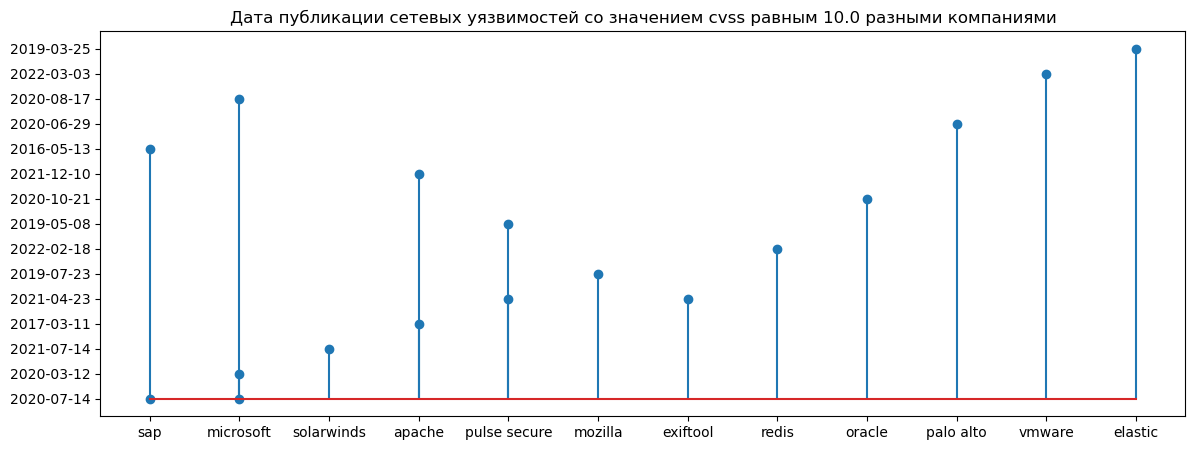

In [42]:
fig = plt.figure(figsize=(14, 5))
ax = fig.add_subplot()
plt.title("Дата публикации сетевых уязвимостей со значением cvss равным 10.0 разными компаниями")
line2 = ax.stem(most_dangerous['vendor_project'], most_dangerous['pub_date'])